In [1]:
import time
from io import StringIO
from pathlib import Path
import pytesseract
import pandas as pd
from PIL import Image, ImageDraw

In [3]:
pd.options.display.max_rows = 100
pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"

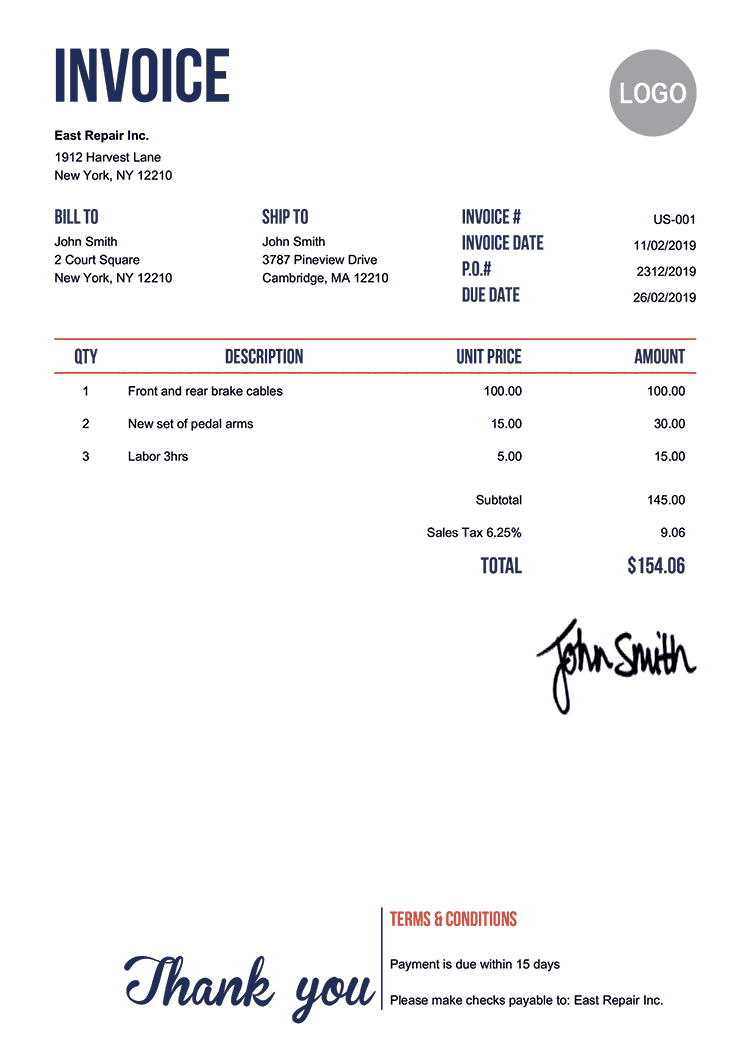

In [4]:
sample_image = Path("./invoice.png")
img = Image.open(sample_image)
img

In [5]:
data_df = pd.read_csv(StringIO(pytesseract.image_to_data(img)), sep="\t")
data_df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,750,1061,-1.000000,NaN
1,2,1,1,0,0,0,56,48,173,54,-1.000000,NaN
2,3,1,1,1,0,0,56,48,173,54,-1.000000,NaN
3,4,1,1,1,1,0,56,48,173,54,-1.000000,NaN
4,5,1,1,1,1,1,56,48,173,54,96.745461,INVOICE


In [6]:
data_df[~data_df.text.isna()]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,56,48,173,54,96.745461,INVOICE
8,5,1,2,1,1,1,55,130,26,10,96.649719,East
9,5,1,2,1,1,2,85,130,39,13,96.736977,Repair
10,5,1,2,1,1,3,128,130,20,10,88.066689,Inc.
12,5,1,2,1,2,1,56,152,26,10,79.712845,1912
13,5,1,2,1,2,2,87,152,42,10,96.046051,Harvest
14,5,1,2,1,2,3,134,152,27,10,96.046051,Lane
16,5,1,2,1,3,1,55,170,25,10,95.305634,New
17,5,1,2,1,3,2,83,170,29,12,96.657097,"York,"
18,5,1,2,1,3,3,117,170,17,10,95.726509,NY


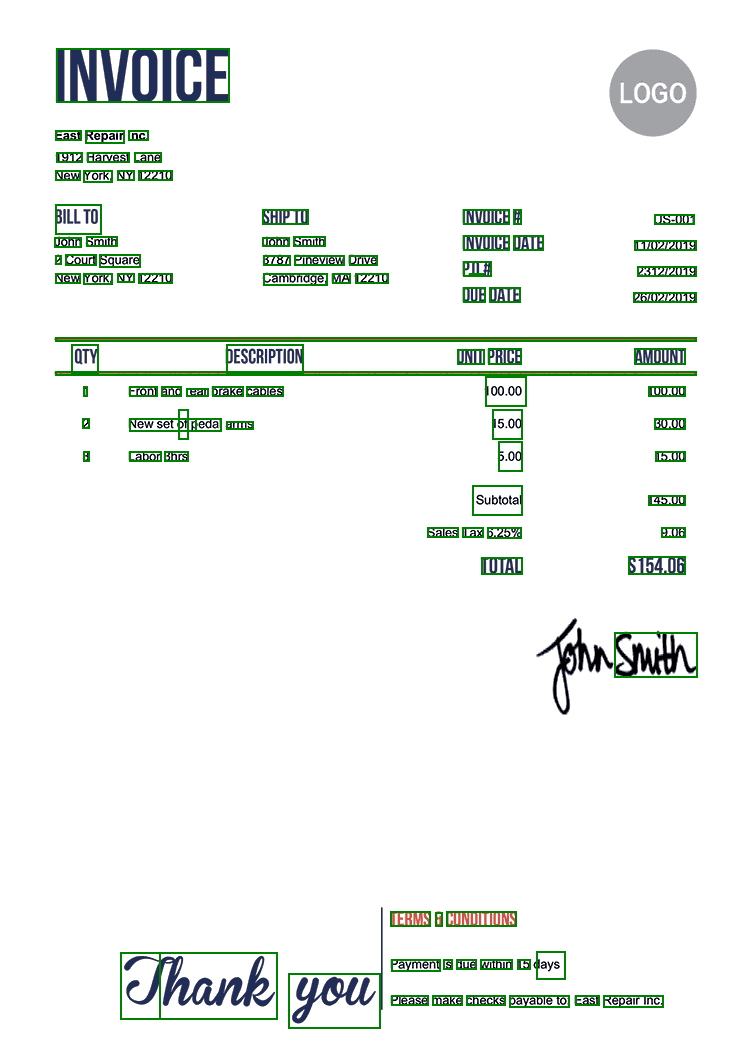

In [43]:
img = Image.open(sample_image)
draw = ImageDraw.Draw(img)
for ix, row in data_df[~data_df.text.isna()].iterrows():
    draw.rectangle((row.left, row.top, row.left+row.width, row.top+row.height), outline="green", width=2)
    # time.sleep(1)
img